<img src="sarcasm.jpg" style = "width:800px; height:200px"/> 

# "SARCASM" 

## A PREDICTIVE STUDY OF SARCASTIC COMMENTS USING MACHINE LEARNING

***
***IOD CAPSTONE PROJECT BY YUAN CHAN***
***

Extract from dataset source KAGGLE:
https://www.kaggle.com/danofer/sarcasm

## Overview and Project objective:

To investigate a subset of 1.3 million comments (150000) from the Internet commentary website Reddit) through **supervised learning machine learning approaches (both conventional and deep learning algorithms)** to predict the occurence of sarcastic content.

The investigation will undertake feature engineering for potential extraction of sarcastic markers and attempt to address both text meta-features as well as the context of comments. 

Conventional machine learning approaches (contained in this notebook) will address the text from the "comment" feature in the dataset. The "parent comment" or context of the comment in question will be addressed indirectly through the use of meta-features such as cosine similarity and sentiment polarity with the "comment".

Deep learning (contained in separate notebooks) algorithms will accept the direct input of both the "comment" and "parent comment" texts for processing and identification of prediction features.

## Context:

The dataset was generated by scraping comments from Reddit containing the \s ( sarcasm) tag. This tag is often used by Redditors to indicate that their comment is in jest and not meant to be taken seriously, and is generally a reliable indicator of sarcastic comment content.

## Content:

Data is 50/50 balanced. (True ratio is about 1:100). The corpus has 1.3 million comments ('comment'), along with what they responded to ('parent comment').

10 columns of features - refer Dataset features below.

Labelled comments (balanced dataset) are in the train-balanced-sarcasm.csv file.

## Acknowledgements:

The data was gathered by: Mikhail Khodak and Nikunj Saunshi and Kiran Vodrahalli for their article "A Large Self-Annotated Corpus for Sarcasm". The data is hosted here.

## Citation:

@unpublished{SARC,
  authors={Mikhail Khodak and Nikunj Saunshi and Kiran Vodrahalli},
  title={A Large Self-Annotated Corpus for Sarcasm},
  url={https://arxiv.org/abs/1704.05579},
  year=2017
}

## Dataset features:

Sources: 
https://www.reddit.com/wiki/faq 

https://www.techopedia.com/definition/31605/upvote

https://www.techopedia.com/definition/31606/downvote

**COMMENT** is the user posted text that is being labelled with the target 0 (Non-Sarcastic) or 1 (Sarcastic)

**PARENT COMMENT** is the original comment that **COMMENT** is responding to. In this investigation, this is the context.

**SUBREDDIT** Subreddits are dedicated to a particular topic that people write about e.g. gaming.

**UPVOTE** is a method on the website Reddit by which users can signal their approval or support for a post. Upvotes move a post towards the top of the site, and they are a way to measure how many people approve of the content that is in a post.

**DOWNVOTE** is an action that a user can take on the Reddit website (and in some other user interfaces) that is used to signal disapproval or try to downgrade a post and its content

**SCORE** is simply the number of upvotes minus the number of downvotes. If five users like the submission and three users don't it will have a score of 2. Please note that the vote numbers are not "real" numbers, they have been "fuzzed" to prevent spam bots etc. So taking the above example, if five users upvoted the submission, and three users downvote it, the upvote/downvote numbers may say 23 upvotes and 21 downvotes, or 12 upvotes, and 10 downvotes. The points score is correct, but the vote totals are "fuzzed".

# PROJECT BREAKDOWN:
This project will be documented in 3 separate notebooks, as follows:

* Part 1 - Exploratory Data Analysis (EDA)
* Part 2 - Modelling (Conventional machine learning algorithms) (Note: Some overlap of content with Part 1 for pre-processing  stages)
* Part 3 - Modelling (Deep Learning approaches):
           A) Basic forward feed multi-level perceptron
           B) BERT transformer + Bi-directional LSTM with 'comment' and 'parent comment' input
           C) BERT transformer + Bi-directional LSTM with fine-tuning on NLI dataset

*** 
# PART 2 - MODELLING WITH CONVENTIONAL MACHINE LEARNING ALGORITHMS 
 ***

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import time

import string
import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import seaborn as sns
import wordcloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from collections import Counter

## for text processing
import re
import nltk

## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

C:\Users\Yuan\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## LOAD DATASET

In [2]:
# Load dataset

df_full = pd.read_csv('train-balanced-sarcasm.csv')

In [3]:
#Set limits for display of dataset on notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## PRELIMINARY DATA INVESTIGATION

In [4]:
# Check size of dataset - it contains 1010826 entries with 10 feature columns

df_full.shape

(1010826, 10)

In [5]:
df_full.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."
1,0,You do know west teams play against west teams more than east teams right?,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.
2,0,"They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york nigga"" ones are.",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for that. It was made by our boy EASports_MUT


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [7]:
df_full.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [8]:
# Check to proportion of sarcastic and non-sarcastic comments. Dataset is fully (50-50) balanced with 505413 entries each.

df_full.label.value_counts()

0    505413
1    505413
Name: label, dtype: int64

In [9]:
# Check number of subreddit groups

df_full.subreddit.value_counts()

AskReddit              65677
politics               39496
worldnews              26377
leagueoflegends        21037
pcmasterrace           18988
                       ...  
SciontC                1    
CivilExRA              1    
ChristopherHitchens    1    
ubisoft                1    
PNCircleJerk           1    
Name: subreddit, Length: 14878, dtype: int64

In [10]:
# Check number of authors posting

df_full.author.value_counts()

Biffingston         845
pokemon_fetish      432
NeonDisease         422
ShyBiDude89         404
ivsciguy            342
                   ... 
1490points          1  
Littolo             1  
commie-chameleon    1  
Anarchofire501      1  
KungFooRobot        1  
Name: author, Length: 256561, dtype: int64

## PRELIMINARY DATA PRE-PROCESSING

In [11]:
# Check for null / NaN entries - all columns fully accounted for except for 'comments' with 53 null entries.

df_full.isnull().sum(), df_full.isna().sum()

(label             0 
 comment           53
 author            0 
 subreddit         0 
 score             0 
 ups               0 
 downs             0 
 date              0 
 created_utc       0 
 parent_comment    0 
 dtype: int64,
 label             0 
 comment           53
 author            0 
 subreddit         0 
 score             0 
 ups               0 
 downs             0 
 date              0 
 created_utc       0 
 parent_comment    0 
 dtype: int64)

In [12]:
# Drop the rows corresponding to the null entries in the 'comments' feature

df_full.dropna(inplace = True)

In [13]:
df_full.isna().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [14]:
# By inspection the 'date' feature is redundant as the 'created_utc' feature contains both the date and time. Drop 'date' column

df_full.drop(['date'], axis = 1, inplace = True)

# EXTRACT DATASET SAMPLE - 150 000 ENTRIES

In [15]:
# Reduce size of dataset to 150000 entries including train, validation and testing sets. 
# Stratified sampling will be used to ensure that proportion of sarcastic and non-sarcastic entries are maintained at 50%/50%
# (ie. 50,000 random samples of each 'sarcastic' and 'non-sarcastic' category)
# Call this new dataset 'df'

df = df_full.groupby('label', group_keys=False).apply(lambda x: x.sample(75000, random_state=0))


In [16]:
df.shape

(150000, 9)

In [17]:
# Check that balanced dataset proportioning is retained

df.label.value_counts()

0    75000
1    75000
Name: label, dtype: int64

In [18]:
# Determine number of words in the 'comment' and 'parent_comment' columns

#Count number of words

def count_words(string):
    # Split the string into words
    words = string.split()
   
    # Return the number of words
    return len(words)

df['w_cnt_comment'] = df['comment'].apply(count_words)
df['w_cnt_pcomment'] = df_full['parent_comment'].apply(count_words)


In [20]:
#Investigate the number of words in both the 'comment' and 'parent_comment' columns - some of the columns seem much longer than
# others

df['w_cnt_comment'].describe(), df['w_cnt_pcomment'].describe()

# The results show that at the 75% percentile, there are 14 words for 'comment' and 26 words for 'parent comment'

(count    150000.000000
 mean     10.514747    
 std      12.081958    
 min      1.000000     
 25%      5.000000     
 50%      9.000000     
 75%      14.000000    
 max      1664.000000  
 Name: w_cnt_comment, dtype: float64,
 count    150000.000000
 mean     24.405240    
 std      41.714666    
 min      1.000000     
 25%      8.000000     
 50%      13.000000    
 75%      26.000000    
 max      2244.000000  
 Name: w_cnt_pcomment, dtype: float64)

In [21]:
# Check number of entries with number of words > 120 
# (which is about the 128 word limit for a deep learning transformer encoder like BERT)

df[df['w_cnt_comment'] >= 120].count(),  df[df['w_cnt_pcomment'] >= 120].count()

# 'comment' category has 21 entries with 120 or more words whereas 'parent_comment' category has 3285 entries 
# with 120 or more words. These are a relatively small proportion of either category (<5% at worst). 

(label             21
 comment           21
 author            21
 subreddit         21
 score             21
 ups               21
 downs             21
 created_utc       21
 parent_comment    21
 w_cnt_comment     21
 w_cnt_pcomment    21
 dtype: int64,
 label             3285
 comment           3285
 author            3285
 subreddit         3285
 score             3285
 ups               3285
 downs             3285
 created_utc       3285
 parent_comment    3285
 w_cnt_comment     3285
 w_cnt_pcomment    3285
 dtype: int64)

## TEXT PRE-PROCESSING 

In [22]:
# Reduce number of sentences in 'parent_comment' to max 2. 
# This limit accounts for the fact that 75th percentile words for 'parent_comment' are 27 words or less so 2 sentences should
# capture most of the information and at the same time account for minimising "noise" from including too many sentences.
# The reduced sentences will be included in a new feature column 'pcomment_red'

In [23]:
def limit_sent(phrase):
    sentence = ' '.join(re.split(r'(?<=[.?!])\s+', phrase, 2)[:2])
    return sentence

df['pcomment_red'] = df['parent_comment'].apply(limit_sent)

### STOP-WORD REMOVAL

It is not always appropriate to remove stopwords as these can provide important contextual markers in the prediction of sarcasm.

In this project, a test run with stopwords has been carried out and shown to reduce accuracy hence stopwords will be retained.

It may be that the stopword list is too extensive and that a truncated version of the list may be effective in improving scores
by enabling better generalisation - however, this will not be investigated in this project exercise due to time limitations.

For the purposes of project demonstration, the code / procedure that should be run if stopwords were to be removed is retained per below but not executed.

In [24]:
# Check NLTK stopwords list and modify as required

In [25]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
#remove words that are in NLTK stopwords list ("no" and "not" since these are often included in sarcastic expressions)

# Words that commonly feature in sarcastic expressions should be filtered out from the stopwords list

not_stopwords = {'no','not'} 
final_stopwords = set([word for word in stop_words if word not in not_stopwords])

final_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'sam

### LOWER-CASING, LEMMATISATION AND REMOVAL OF PUNCTUATION, NUMBERS AND SYMBOLS

In [27]:
%%time

def parser(x):
    x = re.sub('[^a-z\s]', '', x.lower())  #drop any symbol except a-z
#   x = [w for w in x.split() if w not in set(final_stopwords)]  #This operation would be required to remove stopwords
    x = [w for w in x.split()]
   
    return ' '.join(x)

df['new_comment'] = df['comment'].apply(lambda x: parser(x))
df['new_pcomment_red'] = df['pcomment_red'].apply(lambda x: parser(x))

Wall time: 2.27 s


### Lemmatization

From: https://opendatagroup.github.io/data%20science/2019/03/21/preprocessing-text.html

"*Lemmatization is a critical step in a number of tasks, but there are times in which it is not appropriate. Some applications decisively benefit from lemmatization. Topic modeling, for example, relies on the distribution of content words, the identification of which is dependent on a string match between words, which is achieved by lemmatizing their forms so that all variants are consistent across documents. TD-IDF and LDA therefore both benefit in general from lemmatization. Lemmatization is also important for training word vectors, since accurate counts within the window of a word would be disrupted by an irrelevant inflection like a simple plural or present tense inflection.*"

Lemmatization has been investigated and found to increase accuracy slightly in TFIDF vectorization results but the increase is not significant. Lemmatization will be incorporated into the text entries in this notebook.

In [33]:
%%time

#Lemmatize text and store in new columns 'new_comment_lemm' and 'new_pcomment_lemm'

nlp = spacy.load("en_core_web_sm") #load Spacy

def lemmatize(text):

    doc = nlp(text)
    doc = " ".join([token.lemma_ for token in doc])
    
    return doc

df['new_comment_lemm'] = df['new_comment'].apply(lambda x: lemmatize(x))
df['new_pcomment_lemm'] = df['new_pcomment_red'].apply(lambda x: lemmatize(x))

Wall time: 45min 29s


# FEATURE ENGINEERING: META-FEATURES

### NEW FEATURE 1: Separate date / time into individual year, month and hour

In [34]:
%%time

# Extract UTC time category into individual date / month / time (hour) features

# import datetime class from datetime module
from datetime import datetime

# Function to extract year
def date_year(string):
    # Split the string into individual date categories
    date = datetime.strptime(string,"%Y-%m-%d %H:%M:%S")
   
    # Return the year
    return date.year

# Function to extract month
def date_month(string):
    # Split the string into individual date categories
    date = datetime.strptime(string,"%Y-%m-%d %H:%M:%S")
   
    # Return the month
    return date.month

# Function to extract hour
def date_hour(string):
    # Split the string into individual date categories
    date = datetime.strptime(string,"%Y-%m-%d %H:%M:%S")
   
    # Return the time (hour)
    return date.hour

df['year'] = df.created_utc.apply(date_year)
df['month'] = df.created_utc.apply(date_month)
df['hour'] = df.created_utc.apply(date_hour)

Wall time: 29.1 s
Parser   : 184 ms


In [35]:
%%time

# Check range of entries by year

df.year.describe(), df.year.nunique()

# 8 distinct year entries

Wall time: 711 ms


(count    150000.000000
 mean     2015.040007  
 std      1.221503     
 min      2009.000000  
 25%      2015.000000  
 50%      2015.000000  
 75%      2016.000000  
 max      2016.000000  
 Name: year, dtype: float64,
 8)

In [36]:
%%time

# Check range of entries by month

df.month.nunique()

#12 distinct month entries

Wall time: 11 ms


12

###  NEW FEATURE 2: Cosine similarity between the comment and context

Methodology: We need a way to compare the context of the comment ("pcomment_red") with the comment ("comment") itself. We will investigate using the cosine similarity between the 2 compared sentences to see if this approach can identify reliable markers for sarcastic posts, such as contradiction in expression. We will use the BERT transformer as a basis to make the comparisons.

From:

https://www.sbert.net/docs/pretrained_models.html

We will employ the "msmarco-distilbert-base-v4" model - this has been tuned to be used with cosine similarity.

In [39]:
%%time

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('msmarco-distilbert-base-v3')

def cos_sim(text1, text2):
    
    sentences = [text1, text2]
    embeddings = model.encode(sentences, convert_to_tensor = True)

    cos_sim = cosine_similarity(embeddings, embeddings)
    
    return cos_sim[0][1]

Wall time: 9.14 s


In [45]:
%%time

df['cos_sim'] = df.apply(lambda x: cos_sim(x["new_comment"], x["new_pcomment_red"]), axis = 1)   

Wall time: 6h 31min 27s


### NEW FEATURE 3: Change in sentiment polarity between comment and parent comment

In [94]:
from textblob import TextBlob

def polarity(text):
    polar_txt = TextBlob(text)
    polar_result = polar_txt.sentiment.polarity
    
    return polar_result

In [95]:
%%time

df['comment_polar'] = df.apply(lambda x: polarity(x["comment"]), axis = 1)
df['parent_comment_polar'] = df.apply(lambda x: polarity(x["parent_comment"]), axis = 1)
df['polar'] = abs(df['comment_polar']-df['parent_comment_polar'])

Wall time: 3min 4s


### NEW FEATURE 4: Text counts


For the 'comment' column, investigate the significance of the following new features on whether the comment is sarcastic:

* Count total number of characters ('char_count')
* Count total number of words ('word_count')
* Count total number of punctuations ('punctuation count')
* Count total number of uppercase words ('uppercase_word_count')
* Determine word density ('word_density')


In [37]:
%%time
df['char_count'] = df['comment'].apply(len)
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count'] + 1)
df['punctuation_count'] = df['comment'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
df['uppercase_word_count'] = df['comment'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

Wall time: 29.3 s


### NEW FEATURE 5: Part of speech (POS) counts

In [83]:
%%time

# Returns number of adjectives
def adjectives(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of adjectives
    return pos.count('ADJ')

df['adjective_count'] = df['new_comment'].apply(adjectives)

Wall time: 22min 5s


In [84]:
%%time

# Returns number of adverbs
def adverbs(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of adverbs
    return pos.count('ADV')

df['adverb_count'] = df['new_comment'].apply(adverbs)

Wall time: 21min 58s


# Check for correlation against numeric features

### Correlation matrix

## TEXT VECTORIZATION AS ADDITIONAL FEATURE ENGINEERING



### Perform 80/20 train-test split

In [38]:
X = df[["new_comment_lemm"]] #Only the primary comment is used as a predictor variable due to the low correlation of all other 
                             #features. The parent comment feature will be looked at by deep learning models.
y = df['label']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120000, 1), (30000, 1), (120000,), (30000,))

### 1. Count Vectors as features

In [40]:
# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')

# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(df['new_comment_lemm'])

# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train['new_comment_lemm'])
X_test_count = count_vect.transform(X_test['new_comment_lemm'])

In [41]:
X_train_count.shape, X_test_count.shape

((120000, 53869), (30000, 53869))

### 2. TF-IDF Vectors as features
- Word level
- N-Gram level
- Character level

In [42]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(df['new_comment_lemm'])
X_train_tfidf = tfidf_vect.transform(X_train['new_comment_lemm'])
X_test_tfidf  = tfidf_vect.transform(X_test['new_comment_lemm'])

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
Wall time: 5.73 s


In [43]:
X_train_tfidf.shape, X_test_tfidf.shape

((120000, 5000), (30000, 5000))

In [44]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(df['new_comment_lemm'])
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train['new_comment_lemm'])
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test['new_comment_lemm'])

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
Wall time: 16.3 s


In [45]:
X_train_tfidf_ngram.shape

(120000, 5000)

In [46]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(df['new_comment_lemm'])
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train['new_comment_lemm'])
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test['new_comment_lemm'])

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3))
Wall time: 31.4 s


In [47]:
X_train_tfidf_ngram_chars.shape

(120000, 5000)

### 3. Word embedding - FastText Vectorization

Source: https://ai.intelligentonlinetools.com/ml/fasttext-word-embeddings-text-classification-python-mlp/

FastText is an open-source, free, lightweight library that allows users to learn text representations and text classifiers.

fastText, is created by Facebook’s AI Research (FAIR) lab. The model is an unsupervised learning algorithm for obtaining vector representations for words.

Fasttext treats each word as composed of character ngrams. So the vector for a word is made of the sum of this character n grams. Word2vec (and glove) treat words as the smallest unit to train on. This means that fastText can generate better word embeddings for rare words. Also fastText can generate word embeddings for out of vocabulary word but word2vec and glove can not do this.

In [48]:
import gensim
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [49]:
def sentence_to_vec(s, embedding_dict, tokenizer):
    words = str(s).lower()
    words = tokenizer(words)
    words = [w for w in words if w.isalpha()]
    
    M = []
    for w in words:
        if w in embedding_dict:
            M.append(embedding_dict[w])
    
    if len(M) == 0:
        return np.zeros(300)
    
    M = np.array(M)
    v = M.sum(axis=0)
    v / np.sqrt((v ** 2).sum())
    return v

In [ ]:
%%time

from gensim.models import KeyedVectors
embed_f = KeyedVectors.load_word2vec_format('C:\IOD data science\Projects\Capstone Project\Reddit\wiki-news-300d-1M.vec')

In [143]:
embed_f.vector_size

300

In [144]:
X_train_ft = []
for review in tqdm(X_train['new_comment_lemm']):
    X_train_ft.append(
        sentence_to_vec(
            s = review,
            embedding_dict = embed_f,
            tokenizer = word_tokenize
        )
    )

X_test_ft = []
for review in tqdm(X_test['new_comment_lemm']):
    X_test_ft.append(
        sentence_to_vec(
            s = review,
            embedding_dict = embed_f,
            tokenizer = word_tokenize
        )
    )

X_train_ft = np.array(X_train_ft)
X_test_ft = np.array(X_test_ft)

100%|██████████████████████████████████| 30000/30000 [00:08<00:00, 3710.36it/s]


## MODELLING - TRADITIONAL APPROACHES

Modelling (non-deep learning approaches) will be conducted in 3 stages / phases to optimise modelling run times and computational resources:

* In the preliminary / first stage, modelling will be purely carried out on the 'new_comment' text with learning models that 
are assigned default (non-tuned) parameters.

* In the second stage, investigation will be carried out to see if feature unions between the text content and other meta-features or between different forms of text vectorization can yield improvements to the results.

* In the third stage, hyper-parameter tuning will be conducted on a collection of the best modelling approaches and feature categories.

Deep learning approaches will be covered in separate notebooks.


In [52]:
## helper function

## Function to return accuracy on TEST data

def test_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

## Function to return accuracy on TRAIN data

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_train)

In [53]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors',
                                  'FastText Vectors'])

### 1. Naive Bayes classifier

In [131]:
%%time
# Naive Bayes on Count Vectors
NB_accuracy1 = test_model(MultinomialNB(), X_train_count, y_train, X_test_count)
NB_accuracy1_train = train_model(MultinomialNB(), X_train_count, y_train, X_train_count)

print('NB, Count Vectors test accuracy: %.4f' % NB_accuracy1)
print('NB, Count Vectors train accuracy: %.4f' % NB_accuracy1_train)



NB, Count Vectors test accuracy: 0.6585
NB, Count Vectors train accuracy: 0.7508
Wall time: 357 ms


In [132]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
NB_accuracy2 = test_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
NB_accuracy2_train = train_model(MultinomialNB(), X_train_tfidf, y_train, X_train_tfidf)

print('NB, WordLevel TF-IDF test accuracy: %.4f' % NB_accuracy2)
print('NB, WordLevel TF-IDF train accuracy: %.4f' % NB_accuracy2_train)

NB, WordLevel TF-IDF test accuracy: 0.6644
NB, WordLevel TF-IDF train accuracy: 0.6908
Wall time: 107 ms


In [133]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
NB_accuracy3 = test_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
NB_accuracy3_train = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_train_tfidf_ngram)

print('NB, N-Gram Vectors test accuracy: %.4f' % NB_accuracy3)
print('NB, N-Gram Vectors train accuracy: %.4f' % NB_accuracy3_train)

NB, N-Gram Vectors test accuracy: 0.6522
NB, N-Gram Vectors train accuracy: 0.6723
Wall time: 83 ms


In [134]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
NB_accuracy4 = test_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
NB_accuracy4_train = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_train_tfidf_ngram_chars)

print('NB, CharLevel Vectors test accuracy: %.4f' % NB_accuracy4)
print('NB, CharLevel Vectors train accuracy: %.4f' % NB_accuracy4_train)

NB, CharLevel Vectors test accuracy: 0.6439
NB, CharLevel Vectors train accuracy: 0.6600
Wall time: 304 ms


In [145]:
%%time
# # Naive Bayes on FastText Vectors
NB_accuracy5 = test_model(GaussianNB(), X_train_ft, y_train, X_test_ft)
NB_accuracy5_train = train_model(GaussianNB(), X_train_ft, y_train, X_train_ft)

print('NB, FastText Vectors test accuracy: %.4f' % NB_accuracy5)
print('NB, FastText Vectors train accuracy: %.4f' % NB_accuracy5_train)

NB, FastText Vectors test accuracy: 0.5147
NB, FastText Vectors train accuracy: 0.5151
Wall time: 3.38 s


In [150]:
results.loc['Naïve Bayes'] = {
    'Count Vectors': NB_accuracy1,
    'WordLevel TF-IDF': NB_accuracy2,
    'N-Gram Vectors': NB_accuracy3,
    'CharLevel Vectors': NB_accuracy4,
    'FastText Vectors': NB_accuracy5}

**DISCUSSION FOR NAIVE BAYES MODELLING:**

The highest accuracy scores obtained with Naive Bayes are for Word Level TFIDF vectors (0.66). 

The results for Naive Bayes modelling indicate marginal overfitting on all but the Count Vectorized results where overfitting is large.
There is potential for the test results to be improved for the Count Vectorized results with hyper-parameter tuning.

### 2. Logistic regression linear classifier

In [136]:
%%time
# Linear Classifier on Count Vectors
LR_accuracy1 = test_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_train_count, y_train, X_test_count)
LR_accuracy1_train = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_train_count, y_train, X_train_count)

print('LR, Count Vectors test accuracy: %.4f' % LR_accuracy1)
print('LR, Count Vectors train accuracy: %.4f' % LR_accuracy1_train)

LR, Count Vectors test accuracy: 0.6797
LR, Count Vectors train accuracy: 0.7732
Wall time: 22.1 s


In [137]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
LR_accuracy2 = test_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf, y_train, X_test_tfidf)
LR_accuracy2_train = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf, y_train, X_train_tfidf)

print('LR, WordLevel TF-IDF test accuracy: %.4f' % LR_accuracy2)
print('LR, WordLevel TF-IDF train accuracy: %.4f' % LR_accuracy2_train)

LR, WordLevel TF-IDF test accuracy: 0.6776
LR, WordLevel TF-IDF train accuracy: 0.7057
Wall time: 4.09 s


In [138]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
LR_accuracy3 = test_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
LR_accuracy3_train = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram, y_train, X_train_tfidf_ngram)


print('LR, N-Gram Vectors test accuracy: %.4f' % LR_accuracy3)
print('LR, N-Gram Vectors train accuracy: %.4f' % LR_accuracy3_train)

LR, N-Gram Vectors test accuracy: 0.6526
LR, N-Gram Vectors train accuracy: 0.6826
Wall time: 3.63 s


In [139]:
%%time
# Linear Classifier on Character Level TF IDF Vectors
LR_accuracy4 = test_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
LR_accuracy4_train = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram_chars, y_train, X_train_tfidf_ngram_chars)

print('LR, CharLevel Vectors test accuracy: %.4f' % LR_accuracy4)
print('LR, CharLevel Vectors train accuracy: %.4f' % LR_accuracy4_train)

LR, CharLevel Vectors test accuracy: 0.6746
LR, CharLevel Vectors train accuracy: 0.6979
Wall time: 13.1 s


In [151]:
%%time
# Linear Classifier on FastText vectors
LR_accuracy5 = test_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_ft, y_train, X_test_ft)
LR_accuracy5_train = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_ft, y_train, X_train_ft)

print('LR, FastText Vectors test accuracy: %.4f' % LR_accuracy5)
print('LR, FastText Vectors train accuracy: %.4f' % LR_accuracy5_train)

LR, FastText Vectors test accuracy: 0.6411
LR, FastText Vectors train accuracy: 0.6459
Wall time: 15 s


In [152]:
results.loc['Logistic Regression'] = {
    'Count Vectors': LR_accuracy1,
    'WordLevel TF-IDF': LR_accuracy2,
    'N-Gram Vectors': LR_accuracy3,
    'CharLevel Vectors': LR_accuracy4,
    'FastText Vectors': LR_accuracy5}

**DISCUSSION FOR LOGISTIC REGRESSION MODELLING:**

The highest accuracy scores for Logistic Regression are for the Count Vectors (0.68).

The results for Logistic Regression indicate marginal overfitting on all but the Count Vectorized results where overfitting is large.
There is potential for the test results to be improved for the Count Vecorized results with hyper-parameter tuning.

### 3. Support Vector Machine classifier

In [153]:
%%time
# Support Vector Machine on Count Vectors
SVC_accuracy1 = test_model(LinearSVC(), X_train_count, y_train, X_test_count)
SVC_accuracy1_train = train_model(LinearSVC(), X_train_count, y_train, X_train_count)

print('SVM, Count Vectors test accuracy: %.4f' % SVC_accuracy1)
print('SVM, Count Vectors train accuracy: %.4f' % SVC_accuracy1_train)

SVM, Count Vectors test accuracy: 0.6643
SVM, Count Vectors train accuracy: 0.8117
Wall time: 58.3 s


In [154]:
%%time
# Support Vector Machine on Word Level TF IDF Vectors
SVC_accuracy2 = test_model(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf)
SVC_accuracy2_train = train_model(LinearSVC(), X_train_tfidf, y_train, X_train_tfidf)

print('SVM, WordLevel TF-IDF test accuracy: %.4f' % SVC_accuracy2)
print('SVM, WordLevel TF-IDF train accuracy: %.4f' % SVC_accuracy2_train)

SVM, WordLevel TF-IDF test accuracy: 0.6741
SVM, WordLevel TF-IDF train accuracy: 0.7078
Wall time: 3.5 s


In [155]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
SVC_accuracy3 = test_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
SVC_accuracy3_train = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_train_tfidf_ngram)

print('SVM, N-Gram Vectors test accuracy: %.4f' % SVC_accuracy3)
print('SVM, N-Gram Vectors train accuracy: %.4f' % SVC_accuracy3_train)

SVM, N-Gram Vectors test accuracy: 0.6505
SVM, N-Gram Vectors train accuracy: 0.6850
Wall time: 2.56 s


In [156]:
%%time
# Support Vector Machine on Character Level TF IDF Vectors
SVC_accuracy4 = test_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
SVC_accuracy4_train = train_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_train_tfidf_ngram_chars)

print('SVM, CharLevel Vectors test accuracy: %.4f' % SVC_accuracy4)
print('SVM, CharLevel Vectors train accuracy: %.4f' % SVC_accuracy4_train)

SVM, CharLevel Vectors test accuracy: 0.6749
SVM, CharLevel Vectors train accuracy: 0.7068
Wall time: 11.3 s


In [157]:
%%time
# Support Vector Machine on FastText Vectors
SVC_accuracy5 = test_model(LinearSVC(), X_train_ft, y_train, X_test_ft)
SVC_accuracy5_train = train_model(LinearSVC(), X_train_ft, y_train, X_train_ft)

print('SVM, FastText Vectors test accuracy: %.4f' % SVC_accuracy5)
print('SVM, FastText Vectors train accuracy: %.4f' % SVC_accuracy5_train)

SVM, FastText Vectors test accuracy: 0.6386
SVM, FastText Vectors train accuracy: 0.6461
Wall time: 7min 40s


In [158]:
results.loc['Support Vector Machine'] = {
    'Count Vectors': SVC_accuracy1,
    'WordLevel TF-IDF': SVC_accuracy2,
    'N-Gram Vectors': SVC_accuracy3,
    'CharLevel Vectors': SVC_accuracy4,
    'FastText Vectors': SVC_accuracy5}

**DISCUSSION FOR LINEAR SVC MODELLING:**

The highest scores for the Linear SVC are for Word Level TFIDF vectors (0.67)

The results for Linear SVC indicate marginal overfitting on all but the Count Vectorized results where overfitting is large.
There is potential for the test results to be improved for the Count Vecorized results with hyper-parameter tuning.

### BAGGING AND BOOSTING ENSEMBLE METHODS

### 4. Bagging models - Random Forest

In [159]:
%%time
# Bagging (Random Forest) on Count Vectors
RF_accuracy1 = test_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_count, y_train, X_test_count)
RF_accuracy1_train = train_model(RandomForestClassifier(n_estimators = 100, n_jobs =-1), X_train_count, y_train, X_train_count)

print('RF, Count Vectors test accuracy: %.4f' % RF_accuracy1)
print('RF, Count Vectors train accuracy: %.4f' % RF_accuracy1_train)

RF, Count Vectors test accuracy: 0.6817
RF, Count Vectors train accuracy: 0.9926
Wall time: 16min 4s


In [54]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
RF_accuracy2 = test_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_tfidf, y_train, X_test_tfidf)
RF_accuracy2_train = train_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_tfidf, y_train, X_train_tfidf)

print('RF, WordLevel TF-IDF test accuracy: %.4f' % RF_accuracy2)
print('RF, WordLevel TF-IDF train accuracy: %.4f' % RF_accuracy2_train)

RF, WordLevel TF-IDF test accuracy: 0.6792
RF, WordLevel TF-IDF train accuracy: 0.9801
Wall time: 5min 29s


In [161]:
%%time
# Bagging (Random Forest) on Ngram Level TF IDF Vectors
RF_accuracy3 = test_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
RF_accuracy3_train = train_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_tfidf_ngram, y_train, X_train_tfidf_ngram)

print('RF, N-Gram Vectors test accuracy: %.4f' % RF_accuracy3)
print('RF, N-Gram Vectors train accuracy: %.4f' % RF_accuracy3_train)

RF, N-Gram Vectors test accuracy: 0.6407
RF, N-Gram Vectors train accuracy: 0.8760
Wall time: 9min 35s


In [162]:
%%time
# Bagging (Random Forest) on Character Level TF IDF Vectors
RF_accuracy4 = test_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
RF_accuracy4_train = train_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_tfidf_ngram_chars, y_train, X_train_tfidf_ngram_chars)

print('RF, CharLevel Vectors test accuracy: %.4f' % RF_accuracy4)
print('RF, CharLevel Vectors train accuracy: %.4f' % RF_accuracy4_train)

RF, CharLevel Vectors test accuracy: 0.6651
RF, CharLevel Vectors train accuracy: 0.9927
Wall time: 12min 51s


In [163]:
%%time
# Bagging (Random Forest) on FastText Vectors
RF_accuracy5 = test_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_ft, y_train, X_test_ft)
RF_accuracy5_train = train_model(RandomForestClassifier(n_estimators = 100, n_jobs = -1), X_train_ft, y_train, X_train_ft)

print('RF, FastText Vectors test accuracy: %.4f' % RF_accuracy5)
print('RF, FastText Vectors train accuracy: %.4f' % RF_accuracy5_train)

RF, FastText Vectors test accuracy: 0.6353
RF, FastText Vectors train accuracy: 0.9880
Wall time: 2min 43s


In [164]:
results.loc['Random Forest'] = {
    'Count Vectors': RF_accuracy1,
    'WordLevel TF-IDF': RF_accuracy2,
    'N-Gram Vectors': RF_accuracy3,
    'CharLevel Vectors': RF_accuracy4,
    'FastText Vectors': RF_accuracy5}

**DISCUSSION FOR RANDOM FOREST MODELLING:**

The results for Random Forest indicate significant overfitting as can be seen by comparing the test against train accuracy.
There is significant potential for the test results to be improved hence hyper-parameter tuning should be applied.

### 5. Boosting Models - Gradient Boosting

In [165]:
%%time
# Gradient Boosting on Count Vectors
GB_accuracy1 = test_model(GradientBoostingClassifier(), X_train_count, y_train, X_test_count)
GB_accuracy1_train = train_model(GradientBoostingClassifier(), X_train_count, y_train, X_train_count)

print('GB, Count Vectors test accuracy: %.4f' % GB_accuracy1)
print('GB, Count Vectors train accuracy: %.4f' % GB_accuracy1_train)

GB, Count Vectors test accuracy: 0.6368
GB, Count Vectors train accuracy: 0.6422
Wall time: 23min 50s


In [167]:
%%time
# Gradient Boosting on Word Level TF IDF Vectors
GB_accuracy2 = test_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
GB_accuracy2_train = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_train_tfidf)

print('GB, WordLevel TF-IDF test accuracy: %.4f' % GB_accuracy2)
print('GB, WordLevel TF-IDF train accuracy: %.4f' % GB_accuracy2_train)

GB, WordLevel TF-IDF test accuracy: 0.6416
GB, WordLevel TF-IDF train accuracy: 0.6509
Wall time: 1min 51s


In [168]:
%%time
# Gradient Boosting on Ngram Level TF IDF Vectors
GB_accuracy3 = test_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
GB_accuracy3_train = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_train_tfidf_ngram)

print('GB, N-Gram Vectors test accuracy: %.4f' % GB_accuracy3)
print('GB, N-Gram Vectors train accuracy: %.4f' % GB_accuracy3_train)

GB, N-Gram Vectors test accuracy: 0.5804
GB, N-Gram Vectors train accuracy: 0.5923
Wall time: 53.6 s


In [169]:
%%time
# Gradient Boosting on Character Level TF IDF Vectors
GB_accuracy4 = test_model(GradientBoostingClassifier(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
GB_accuracy4_train = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram_chars, y_train, X_train_tfidf_ngram_chars)

print('GB, CharLevel Vectors test accuracy: %.4f' % GB_accuracy4)
print('GB, CharLevel Vectors train accuracy: %.4f' % GB_accuracy4_train)

GB, CharLevel Vectors test accuracy: 0.6492
GB, CharLevel Vectors train accuracy: 0.6595
Wall time: 17min 26s


In [171]:
%%time
# Gradient Boosting on FastText Vectors
GB_accuracy5 = test_model(GradientBoostingClassifier(), X_train_ft, y_train, X_test_ft)
GB_accuracy5_train = train_model(GradientBoostingClassifier( ), X_train_ft, y_train, X_train_ft)

print('GB, FastText test accuracy: %.4f' % GB_accuracy5)
print('GB, FastText train accuracy: %.4f' % GB_accuracy5_train)

GB, FastText test accuracy: 0.6369
GB, FastText train accuracy: 0.6535
Wall time: 47min 40s


In [172]:
results.loc['Gradient Boosting'] = {
    'Count Vectors': GB_accuracy1,
    'WordLevel TF-IDF': GB_accuracy2,
    'N-Gram Vectors': GB_accuracy3,
    'CharLevel Vectors': GB_accuracy4,
    'FastText Vectors': GB_accuracy5}

**DISCUSSION FOR GRADIENT BOOSTING MODELLING:**

The results for Gradient Boosting indicate marginal overfitting on all results.
As such, there may be limited potential for the test results to be improved for the Count Vecorized results with hyper-parameter tuning.


## SUMMARY OF PRELIMINARY MODELLING RESULTS (NO FEATURE UNION / HYPER-PARAMETER TUNING)

In [173]:
# Helper function to display Dataframe summary of results

def results_report(actual, prediction1, prediction2):
    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction1.dtype.name == 'object':
        prediction1 = prediction1.astype(int)
    if prediction2.dtype.name == 'object':
        prediction2 = prediction2.astype(int)

    accuracy1_ = accuracy_score(actual, prediction1)
    precision1_ = precision_score(actual, prediction1)
    recall1_ = recall_score(actual, prediction1)
    roc_auc1_ = roc_auc_score(actual, prediction1)
    
    accuracy2_ = accuracy_score(actual, prediction2)
    precision2_ = precision_score(actual, prediction2)
    recall2_ = recall_score(actual, prediction2)
    roc_auc2_ = roc_auc_score(actual, prediction2)
    
    results = [['Accuracy', 'Precision', 'Recall', 'ROC_AUC'],[accuracy1_,precision1_,recall1_,roc_auc1_], [accuracy2_,precision2_,recall2_,roc_auc2_]]
    
    column_names = results.pop(0)
    index_names = ['Count_vec', 'TFIDF_vec']
    
    results_df = pd.DataFrame(results, index = index_names, columns = column_names)
        
    return results_df

## Summary Table - Preliminary Accuracy Scores

In [174]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors,FastText Vectors
Naïve Bayes,0.658467,0.664433,0.652167,0.643867,0.514667
Logistic Regression,0.679733,0.677567,0.652600,0.674567,0.641100
Support Vector Machine,0.664333,0.674133,0.650467,0.674867,0.638567
Random Forest,0.681700,0.682633,0.640733,0.665100,0.635300
Gradient Boosting,0.636800,0.641600,0.580367,0.649233,0.636900


# SUMMARY REPORTS: RESULTS

In [175]:
# helper function to show results and charts
def show_summary_report(actual, prediction, predict_proba):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, predict_proba)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

### Summary report for results obtained using LOGISTIC REGRESSION for COUNT VECTORIZATION

Accuracy : 0.6776 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6939 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6387 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6777                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


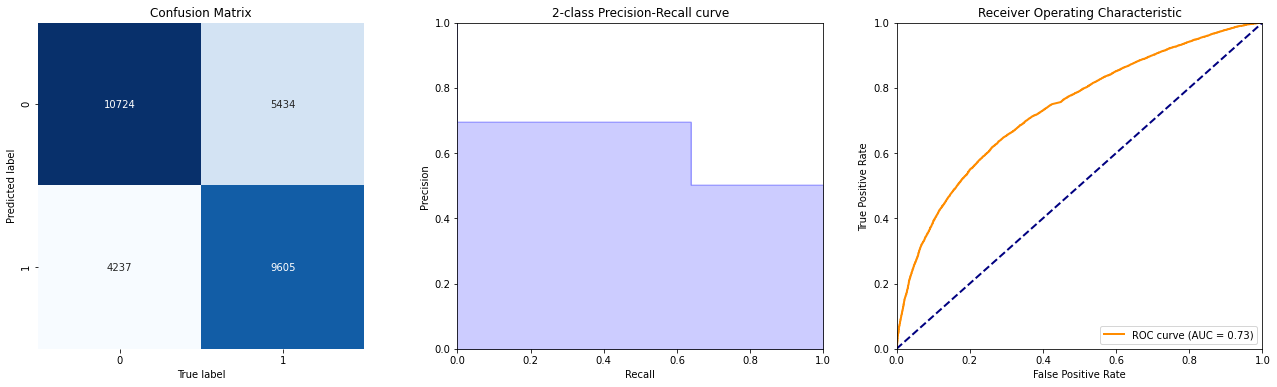

(0.6776333333333333,
 0.6939026152290132,
 0.6386727840946872,
 0.6777348948212223)

In [176]:
model = LogisticRegression().fit(X_train_count, y_train)

LR_count_preds = model.predict(X_test_count)
LR_count_proba = model.predict_proba(X_test_count)
show_summary_report(y_test, LR_count_preds, LR_count_proba[:,1])

### Summary report for results obtained using LOGISTIC REGRESSION for WORD LEVEL TFIDF VECTORIZATION

Accuracy : 0.6775 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6944 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6372 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6776                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


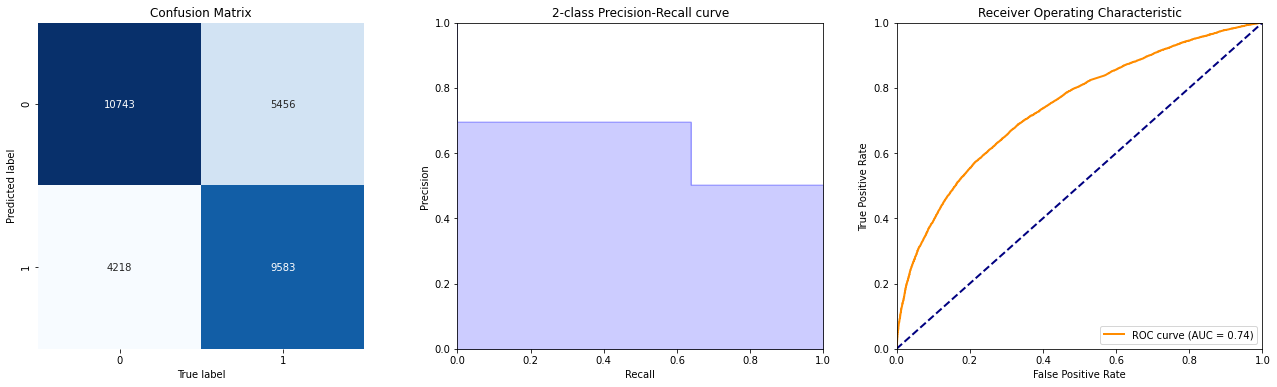

(0.6775333333333333,
 0.6943699731903485,
 0.6372099208723985,
 0.6776384475025719)

In [177]:
model = LogisticRegression().fit(X_train_tfidf, y_train)

LR_tfidf_preds = model.predict(X_test_tfidf)
LR_tfidf_proba = model.predict_proba(X_test_tfidf)
show_summary_report(y_test, LR_tfidf_preds, LR_tfidf_proba[:,1])

### Summary report for results obtained using RANDOM FOREST for COUNT VECTORIZATION

Accuracy : 0.6844 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7032 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6411 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6845                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


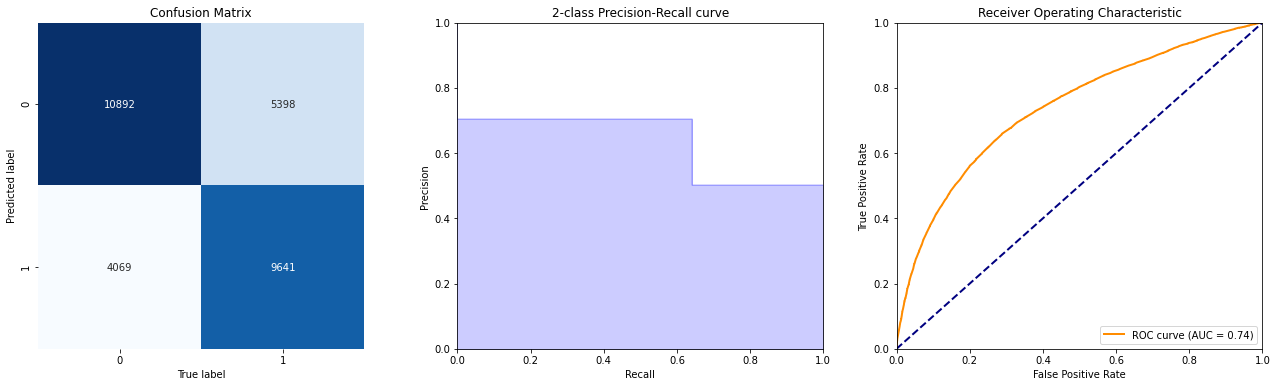

(0.6844333333333333,
 0.7032093362509118,
 0.6410665602766141,
 0.6845463808668679)

In [178]:
model = RandomForestClassifier(n_jobs = -1).fit(X_train_count, y_train)

RF_count_preds = model.predict(X_test_count)
RF_count_proba = model.predict_proba(X_test_count)
show_summary_report(y_test, RF_count_preds, RF_count_proba[:,1])

### Summary report for results obtained using RANDOM FOREST for WORD LEVEL TFIDF VECTORIZATION

Accuracy : 0.6798 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6929 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6488 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6799                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


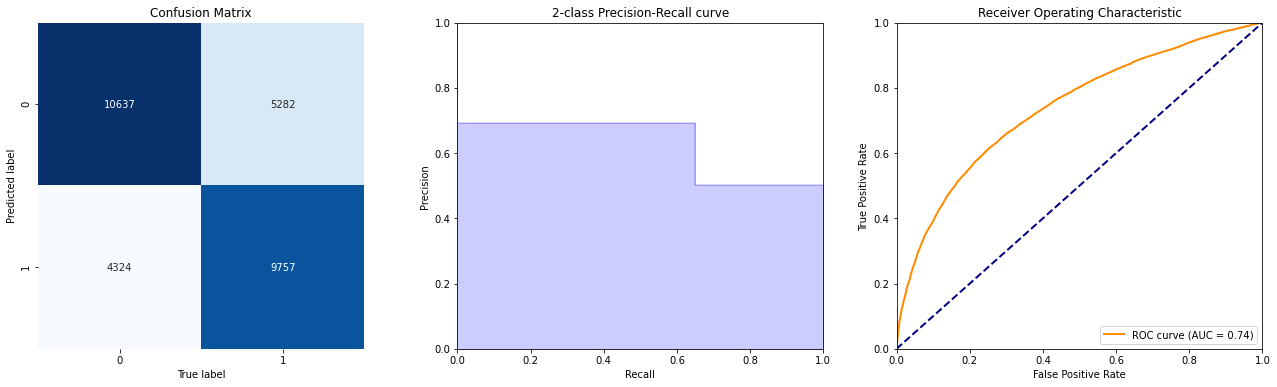

(0.6798, 0.6929195369647042, 0.6487798390850456, 0.6798808626612982)

In [179]:
model = RandomForestClassifier(n_jobs = -1).fit(X_train_tfidf, y_train)

RF_TFIDF_preds = model.predict(X_test_tfidf)
RF_TFIDF_proba = model.predict_proba(X_test_tfidf)
show_summary_report(y_test, RF_TFIDF_preds, RF_TFIDF_proba[:,1])

## Discussion of preliminary results

Preliminary results indicate the following return the highest accuracy scores:

* Count vectorization and Word Level TF-IDF vectorization followed by Character level Vectorization.
* Logistic Regression and Random Forest are the most effective modelling approaches followed by Linear SVC

The highest accuracy score obtained is for Random Forest classification using Word level TFIDF Vectors (68%).

This relatively low score may possibly be improved by the following approaches:

* Increasing the size of the training dataset

* Feature unions between vectorization using different approaches (eg. Count vectors with TFIDF vectors) - this may assist in generalisation.

* Hyper-parameter tuning in conjunction with regularisation approaches

The latter 2 approaches will be investigated below.

It should be noted that although this accuracy is lower than desirable, the results are still substantially higher than the baseline accuracy of 50%.

## FEATURE UNIONS

### Investigate feature unions between Count vectors and Word Level TFIDF vectors

In [68]:
%%time

from sklearn.pipeline import Pipeline, FeatureUnion

union = FeatureUnion([("count_vec",CountVectorizer(token_pattern = r'\w{1,}')), 
                            ("tfidf_vec",TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000))])

X_train_cmb = union.fit_transform(X_train['new_comment'].values.astype(str))
X_test_cmb = union.transform(X_test['new_comment'].values.astype(str))


Wall time: 15.1 s


In [71]:
%%time
# Logistic Regression on combined Count & TFIDF vectors
LR_accuracy_cmb = test_model(LogisticRegression(), X_train_cmb, y_train, X_test_cmb)
LR_accuracy_cmb_train = train_model(LogisticRegression(), X_train_cmb, y_train, X_train_cmb)

print('LR, Count + TFIDF Combined Vectors test accuracy: %.4f' % LR_accuracy_cmb)
print('LR, Count + TFIDF Combined Vectors train accuracy: %.4f' % LR_accuracy_cmb_train)

NB, Count + TFIDF Combined Vectors test accuracy: 0.6712
NB, Count + TFIDF Combined Vectors train accuracy: 0.7584
Wall time: 861 ms


In [72]:
%%time
# Random Forest classifier on combined Count & TFIDF vectors
RF_accuracy_cmb = test_model(RandomForestClassifier(n_jobs = -1), X_train_cmb, y_train, X_test_cmb)
RF_accuracy_cmb_train = train_model(RandomForestClassifier(n_jobs = -1), X_train_cmb, y_train, X_train_cmb)

print('NB, Count + TFIDF Combined Vectors test accuracy: %.4f' % RF_accuracy_cmb)
print('NB, Count + TFIDF Combined Vectors train accuracy: %.4f' % RF_accuracy_cmb_train)

NB, Count + TFIDF Combined Vectors test accuracy: 0.6850
NB, Count + TFIDF Combined Vectors train accuracy: 0.9930
Wall time: 13min 38s


## Discussion of results: 

The LOGISTIC REGRESSION and RANDOM FOREST results for the combined COUNT + TFIDF WORD VECTORIZERS does not result
in significant change to the accuracy results (in fact, the result is very slightly lower).

# HYPER-PARAMETER TUNING

Hyper-parameter tuning will be performed for the Count Vectorization features using GridSearchCV on the following classifiers:

* Logistic Regression
* Random Forest

## Hyper-parameter tuning for Logistic Regression

In [101]:
%%time

# Perform hyper-parameter tuning using Gridsearch CV:

# LOGISTIC REGRESSION

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

logreg = LogisticRegression(max_iter = 1000, solver = 'liblinear', random_state = 42)

logreg_cv = GridSearchCV(logreg, lr_params)
best_LRmodel = logreg_cv.fit(X_train_count, y_train)

print(f"Optimised parameter Penalty:, {best_model.best_estimator_.get_params()['penalty']}")
print(f"Optimised parameter C:, {best_model.best_estimator_.get_params()['C']}")

results = logreg_cv.cv_results_
pd.DataFrame.from_dict(results)

Optimised parameter Penalty:, l1
Optimised parameter C:, 1
Wall time: 5min 27s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.095417,0.288081,0.002,0.002450,1,l1,"{'C': 1, 'penalty': 'l1'}",0.680250,0.682292,0.677875,0.675458,0.672250,0.677625,0.003530,1
1,7.159617,0.160360,0.008,0.004000,1,l2,"{'C': 1, 'penalty': 'l2'}",0.678333,0.678708,0.676292,0.674875,0.669958,0.675633,0.003161,2
2,2.303245,0.635050,0.003,0.002450,10,l1,"{'C': 10, 'penalty': 'l1'}",0.652208,0.660667,0.652375,0.654042,0.647000,0.653258,0.004394,4
3,15.294355,1.449747,0.002,0.004000,10,l2,"{'C': 10, 'penalty': 'l2'}",0.659708,0.665958,0.656875,0.660708,0.651375,0.658925,0.004785,3
4,2.160013,0.542401,0.008,0.004000,100,l1,"{'C': 100, 'penalty': 'l1'}",0.640042,0.642625,0.637250,0.636500,0.634583,0.638200,0.002823,6
5,37.115633,8.581733,0.006,0.004899,100,l2,"{'C': 100, 'penalty': 'l2'}",0.645042,0.650125,0.641625,0.643000,0.639792,0.643917,0.003547,5


In [108]:
# Determine the best logistic regression model from grid search CV results
print(best_LRmodel.best_estimator_)

# Calculate accuracies for both train and test sets to check for overfitting 
print("The mean train accuracy of the model is:",best_LRmodel.score(X_train_count,y_train))
print("The mean test accuracy of the model is:",best_LRmodel.score(X_test_count,y_test))

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
The mean train accuracy of the model is: 0.7393583333333333
The mean test accuracy of the model is: 0.6807666666666666


### Discussion of hyper-parameter tuning for Logistic Regression:

The results (men score) of tuning is very close to the original un-optimised test accuracy hence re-calibration of the model with optimised parameters will yield similar results without much improvement. 

## Hyper-parameter tuning for Random Forest classifier

In [103]:
%%time

# RANDOM FOREST

params = {'n_estimators' : [25, 50, 75],'max_depth' : [2,4,6,8,10], 
          'min_samples_split': [2, 3, 4], 'min_samples_leaf' : [3,4,5]}

RF_cv = GridSearchCV(RandomForestClassifier(n_jobs = -1, random_state=42), params, verbose=1, cv=5)
best_RFmodel = RF_cv.fit(X_train_count, y_train)

results = grid_search_cv.cv_results_
pd.DataFrame.from_dict(results)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Wall time: 20min 56s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.286012,0.013961,0.016801,0.003544,2,3,2,25,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 25}",0.518833,0.516167,0.547333,0.525833,0.533833,0.528400,0.011276,133
1,0.395808,0.021410,0.029001,0.004733,2,3,2,50,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}",0.536500,0.525167,0.554500,0.541667,0.541333,0.539833,0.009455,124
2,0.622416,0.009314,0.036201,0.003709,2,3,2,75,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 75}",0.545000,0.549000,0.561500,0.547500,0.542167,0.549033,0.006651,109
3,0.271003,0.003225,0.016000,0.004899,2,3,3,25,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 25}",0.518833,0.516167,0.547333,0.525833,0.533833,0.528400,0.011276,133
4,0.382002,0.005404,0.023400,0.004271,2,3,3,50,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}",0.536500,0.525167,0.554500,0.541667,0.541333,0.539833,0.009455,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.584011,0.021651,0.026000,0.004899,10,5,3,50,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}",0.621167,0.620333,0.623667,0.627500,0.634500,0.625433,0.005173,28
131,0.844625,0.028898,0.038000,0.004000,10,5,3,75,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 75}",0.629833,0.631000,0.637000,0.639500,0.654833,0.638433,0.008960,4
132,0.358401,0.019855,0.016000,0.004899,10,5,4,25,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 25}",0.599833,0.598167,0.610667,0.601000,0.621333,0.606200,0.008730,55
133,0.582211,0.012844,0.026000,0.004899,10,5,4,50,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}",0.621167,0.620333,0.623667,0.627500,0.634500,0.625433,0.005173,28


In [104]:
# Determine the best logistic regression model from grid search CV results
print(best_RFmodel.best_estimator_)

# Calculate accuracies for both train and test sets to check for overfitting 
print("The mean train accuracy of the model is:",best_RFmodel.score(X_train_count,y_train))
print("The mean test accuracy of the model is:",best_RFmodel.score(X_test_count,y_test))

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=75,
                       n_jobs=-1, random_state=42)
The mean train accuracy of the model is: 0.6592666666666667
The mean test accuracy of the model is: 0.6469


### Discussion of hyper-parameter tuning for Random Forest:

The results (men score) of tuning is very close to the original un-optimised test accuracy hence 
re-calibration of the model with optimised parameters will yield similar results without much improvement to the test results.

However, hyper-parameter tuning will address overfitting.

For illustration, the Random Forest Classifier re-fitted on the tuned parameters reduces the train accuracy from 0.98 using default parameters to 0.655 - refer below:

In [151]:
# Check train accuracy after incorporating hyper-parameter tuning

RF_train_preds = RF_model.predict(X_train_tfidf)
accuracy_train_ = accuracy_score(y_train, RF_train_preds)
accuracy_train_

0.6554833333333333

## TEST PREDICTIONS

In [124]:
# Test predictions with Random Forest + word level TFIDF vectorization incorporating tuned parameters

RF_model = RandomForestClassifier(n_estimators = 75, max_depth = 10, min_samples_leaf = 4, n_jobs = -1, random_state = 42)
RF_model.fit(X_train_tfidf, y_train)

RF_preds = RF_model.predict(X_test_tfidf)
RF_preds[0:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [133]:
y_test[0:10]   #predictions are incorrect 4 times out of 10 ie. accuracy of 60%

360081    0
325532    0
680257    1
385203    1
550486    1
388394    1
339282    0
540064    0
155148    0
882989    0
Name: label, dtype: int64

In [134]:
X_test[0:10]

,new_comment_lemm
360081,well say
325532,nice shot
680257,damn it buy key try to trade up I m off to a good start
385203,wow you must be so disappointed that you fail
550486,I do nt know chizs head be that big
388394,maybe his ult be now an aoe stun
339282,be I wrong
540064,you got ta believe
155148,you have to watch until draymond kick someone so you can be mad online with everyone else
882989,it would ve be around bhp more which be a lot for a kg car


In [135]:
df_pred = X_test[0:10]

In [146]:
#Combine df_pred and y_test dataframes

df_1pred = pd.concat([df_pred, y_test], axis=1, join='inner')
df_1pred = df_1pred.reset_index(drop=True)

df_2 = pd.DataFrame(RF_preds[0:10], columns=['Prediction'])

# Combine df_1pred and df_2 dataframes
frames = [df_1pred, df_2]
df_pred = pd.concat(frames, axis = 1)

In [148]:
df_pred.rename(columns = {'label':'Actual'}, inplace = True)
df_pred.rename(columns = {'new_comment_lemm': "Comment_text"}, inplace = True)

In [149]:
df_pred # 4 incorrect predictions out of 10 ie. 60% accuracy

,Comment_text,Actual,Prediction
0,well say,0,0
1,nice shot,0,0
2,damn it buy key try to trade up I m off to a good start,1,0
3,wow you must be so disappointed that you fail,1,1
4,I do nt know chizs head be that big,1,0
5,maybe his ult be now an aoe stun,1,0
6,be I wrong,0,0
7,you got ta believe,0,0
8,you have to watch until draymond kick someone so you can be mad online with everyone else,0,1
9,it would ve be around bhp more which be a lot for a kg car,0,0
